<a href="https://colab.research.google.com/github/lisseta/datAnalisys_Python/blob/main/OlympicsDatAnalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los Juegos Olímpicos son uno de los eventos deportivos más grandes que presentan competencias deportivas de verano e invierno donde miles de atletas de todo el mundo participan en una variedad de competencias. Participan más de 200 naciones. Los Juegos Olímpicos suelen celebrarse cada cuatro años, alternando entre los Juegos Olímpicos de Verano e Invierno cada dos años en el período de cuatro años. El Comité Olímpico Internacional (COI) se formó en 1894 y los primeros Juegos Olímpicos modernos se celebraron en 1896.


In [1]:
#https://youtu.be/q1FttL_G1G4
#https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
#Importacion de Bibliotecas 
import pandas as pd #Manipulacion y analisis de datos 
import numpy as np #Crea vectores y matrices multidimensionales 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px #Crea diagramas de dispersión y se puede usar con marcos de datos de pandas.

from plotly.subplots import make_subplots
from datetime import datetime 

In [4]:
#Abrir el documento para poder trabajar con el 
atletas = pd.read_csv('/content/athlete_events.csv')
region = pd.read_csv('/content/noc_regions.csv')

In [ ]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
#Iniciando: DataFrames 
atletas = atletas.merge(region, how ='left', on='NOC')
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
atletas.shape

(75541, 17)

In [ ]:
#Nombres de columnas coherentes
atletas.rename(columns={'region':'Region', 'notes':'Notes'}, inplace =True );

In [8]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
atletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75541 entries, 0 to 75540
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      75541 non-null  int64  
 1   Name    75541 non-null  object 
 2   Sex     75541 non-null  object 
 3   Age     72610 non-null  float64
 4   Height  58076 non-null  float64
 5   Weight  57164 non-null  float64
 6   Team    75540 non-null  object 
 7   NOC     75540 non-null  object 
 8   Games   75540 non-null  object 
 9   Year    75540 non-null  float64
 10  Season  75540 non-null  object 
 11  City    75540 non-null  object 
 12  Sport   75540 non-null  object 
 13  Event   75540 non-null  object 
 14  Medal   10534 non-null  object 
 15  region  75476 non-null  object 
 16  notes   1345 non-null   object 
dtypes: float64(4), int64(1), object(12)
memory usage: 10.4+ MB


In [10]:
atletas.describe()

,ID,Age,Height,Weight,Year
count,75541.000000,72610.000000,58076.000000,57164.000000,75540.000000
mean,19469.526813,25.629390,175.476927,70.849083,1977.731480
std,11020.605303,6.464805,10.393140,14.174578,30.150514
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,10011.000000,21.000000,168.000000,61.000000,1960.000000
50%,19397.000000,25.000000,175.000000,70.000000,1984.000000
75%,29024.000000,28.000000,183.000000,79.000000,2002.000000
max,38351.000000,88.000000,223.000000,214.000000,2016.000000


In [13]:
#Comprobando valores nulos 
invalido_valores = atletas.isna() #Detectar valores NAN, arroja booleanos 
invalido_columnas = invalido_valores.any() #ANY Devuelve False a menos que haya al menos un elemento dentro de una serie oa lo largo de un eje de Dataframe que sea True o equivalente (por ejemplo, distinto de cero o no vacío).
invalido_columnas

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team       True
NOC        True
Games      True
Year       True
Season     True
City       True
Sport      True
Event      True
Medal      True
region     True
notes      True
dtype: bool

In [14]:
atletas.isnull().sum()

ID            0
Name          0
Sex           0
Age        2931
Height    17465
Weight    18377
Team          1
NOC           1
Games         1
Year          1
Season        1
City          1
Sport         1
Event         1
Medal     65007
region       65
notes     74196
dtype: int64

In [15]:
#Imprimir que los nombres de las columnas contienen VALORES NULOS/FALTANTES en forma de lista
#Detalles de la India 

atletas.query(' Team == "India" ').head(5) #Consulta las columnas de un DataFrame con una expresión booleana.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984.0,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984.0,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988.0,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [22]:
atletas.query(' Team == "China" ').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [23]:
#Detalles de Japon  
atletas.query(' Team == "Japan" ').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936.0,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976.0,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960.0,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992.0,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972.0,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [25]:
#Top de Paises Participantes  
top10_paises= atletas.Team.value_counts().sort_values(ascending=False).head(10)
top10_paises

United States    5435
France           4905
Italy            4348
Great Britain    3546
Canada           2767
Australia        2441
Sweden           2285
Germany          2252
Spain            1954
Switzerland      1748
Name: Team, dtype: int64

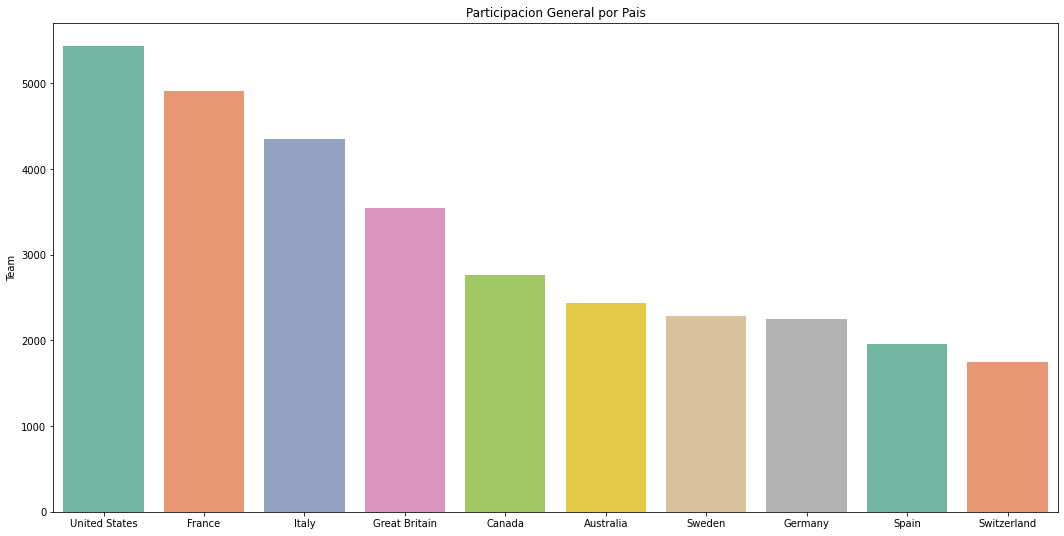

In [46]:
#10 paises participantes 
plt.figure(figsize=(18,9)) #12,6
#plx.xticks(rotation=20)
plt.title('Participacion General por Pais')
sns.barplot(x= top10_paises.index, y= top10_paises, palette= 'Set2');

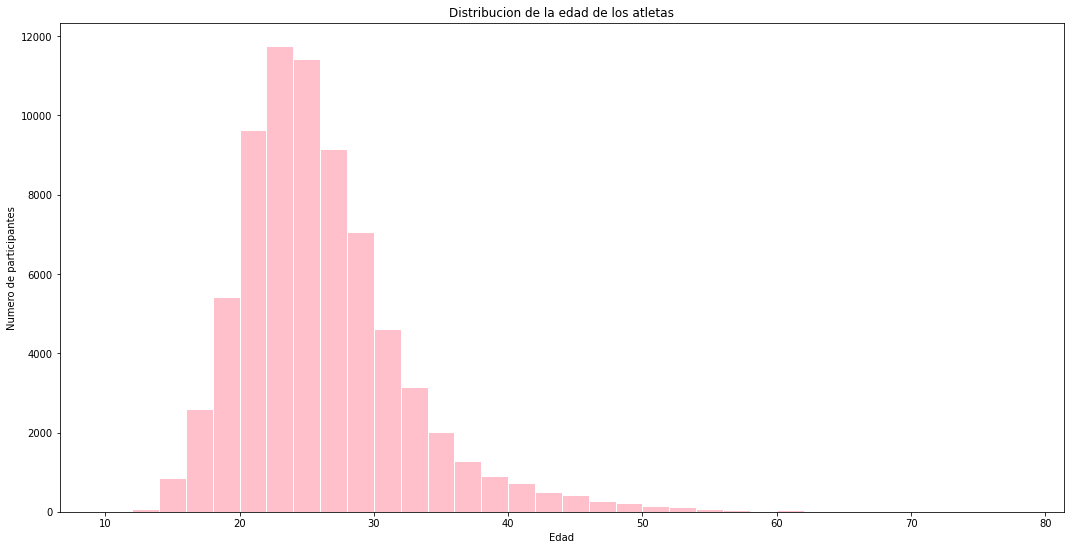

In [45]:
#Distribución por edades de los participantes
plt.figure(figsize=(18,9))
plt.title("Distribucion de la edad de los atletas")
plt.xlabel('Edad')
plt.ylabel('Numero de participantes')
plt.hist(atletas.Age, bins = np.arange(10,80,2), color ='pink', edgecolor = 'white');

#plt.hist: Devuelve un Histograma 
#bins
#Int: define el ancho del rango 
#String: define los bordes 

In [40]:
#Juevos Olimpicos de Invierno 
deporte_invierno= atletas[atletas.Season =='Winter'].Sport.unique() #Devuelve valores únicos basados ​​en una tabla hash.
deporte_invierno

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [42]:
#Juegos Olimpicos de Verano 
deporte_verano= atletas[atletas.Season =='Summer'].Sport.unique()
deporte_verano

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism'], dtype=object)

In [ ]:
#Diagrama circular para atletas masculinos y femeninos
plt.figure(figsize=(18,9))
plt.title("Distribucion de Genero")
